In [4]:
# Google colab authentication 
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [5]:
# Creating drive directory
!mkdir -p drive

# Mounting existing drive to drive directory
!google-drive-ocamlfuse drive
!free -g
%ls

              total        used        free      shared  buff/cache   available
Mem:             12           0           1           0          11          12
Swap:             0           0           0
datalab/  drive/


In [6]:
# Changing directory to project dir
%cd drive/projects/WeatherPred
%ls

/content/drive/projects/WeatherPred
Dataset/  WeatherPred.ipynb


In [0]:
import pandas as pd # CSV manipulation
import numpy as np # Array manipulation
import matplotlib.pyplot as plt # Visualization
import os # Directory manipulation
%matplotlib inline 

In [8]:
df_rainfall = pd.read_csv("Dataset/div_rainfall_01_15.csv")
df_rainfall.head()

,SUBDIVISION,YEAR,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,ANDAMAN & NICOBAR ISLANDS,1901-2015,Mean,49.2,27.6,30.0,72.2,355.6,471.4,397.5,400.5,431.3,289.5,233.0,153.3,2911.0,76.8,457.8,1700.7,675.8
1,ANDAMAN & NICOBAR ISLANDS,1901-2015,Standard deviation,71.3,38.8,43.6,66.8,151.2,147.0,151.9,142.6,146.7,99.4,119.4,129.5,395.9,81.1,176.8,286.3,199.0
2,ANDAMAN & NICOBAR ISLANDS,1901-2015,Coefficient of variation,144.9,140.4,145.5,92.5,42.5,31.2,38.2,35.6,34.0,34.3,51.2,84.5,13.6,105.6,38.6,16.8,29.4
3,ANDAMAN & NICOBAR ISLANDS,1901,Actual,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
4,ANDAMAN & NICOBAR ISLANDS,1901,Percentage departure,-0.1,215.9,-2.6,-96.8,48.7,9.8,-8.2,20.1,-22.9,34.2,139.5,-78.1,15.9,77.5,22.4,-0.3,45.1


In [0]:
def df_cleaned_by_state(df, state="MADHYA MAHARASHTRA", drop_cols=[]):
  df_cleaned = df[(df['SUBDIVISION']==state) & (df['Parameter']=='Actual')]

  # Alternative: 

  # my_query_index = df.query('Parameter == "Actual" & SUBDIVISION =="MADHYA MAHARASHTRA"').index
  # df.iloc[my_query_index, 0]
  df_cleaned.set_index('YEAR', inplace= True)
  drop_cols.extend(['JF', 'MAM', 'JJAS', 'OND', 'ANNUAL', 'Parameter', 'SUBDIVISION'])
  df_cleaned.drop(drop_cols, inplace = True, axis = 1)
  
  return df_cleaned

In [10]:
df_mh = df_cleaned_by_state(df_rainfall)
df_mh.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
1901,18.8,0.6,7.7,36.6,30.4,107.7,215.9,194.1,83.7,68.7,4.4,0.5
1902,7.8,0.0,0.1,5.0,9.8,102.6,210.9,114.5,169.5,60.4,40.5,62.9
1903,7.6,0.0,0.0,3.2,77.2,86.3,281.8,155.5,142.3,74.2,7.6,2.2
1904,0.4,4.7,1.7,3.0,18.7,114.6,126.5,59.5,183.0,91.1,0.0,0.4
1905,0.0,1.2,0.0,2.3,23.6,65.0,252.8,79.0,52.6,52.9,8.3,0.0


In [11]:
df_mh.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,3.054783,1.467826,3.596522,9.146957,22.943478,147.426087,248.980000,184.397391,157.221739,70.194783,25.945217,5.848696
std,6.666652,2.915282,6.411625,9.402000,22.368097,55.088562,73.776111,67.497544,64.154052,47.520595,34.042843,11.789382
min,0.000000,0.000000,0.000000,0.000000,0.300000,30.700000,68.400000,59.500000,29.900000,3.400000,0.000000,0.000000
25%,0.000000,0.000000,0.200000,3.200000,7.350000,109.650000,198.800000,139.050000,102.900000,36.700000,3.650000,0.000000
50%,0.700000,0.200000,1.500000,6.300000,15.200000,146.400000,247.000000,186.600000,161.300000,57.700000,10.700000,0.900000
75%,2.600000,1.550000,4.200000,12.100000,33.000000,179.900000,304.600000,230.900000,200.700000,95.200000,30.500000,4.800000
max,41.500000,20.000000,41.200000,54.500000,104.200000,293.800000,421.700000,421.700000,324.800000,196.000000,152.800000,62.900000


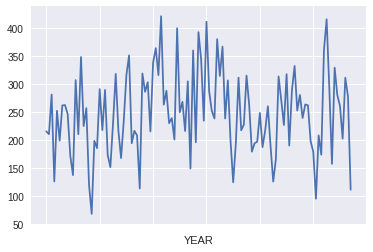

In [12]:
df_mh['JUL'].plot()

In [0]:
f_data = df_mh.values
mean = f_data.mean(axis=0)
f_data -= mean
sd = f_data.std(axis=0)
f_data /= sd

In [0]:
def generator(data, lookback, delay, min_index, max_index, shuffle =False, batch_size =10, step =1):
    if max_index is None:
        max_index= len(data)-delay-1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index+lookback, max_index, size = batch_size)
        else:
            if i+batch_size >= max_index:
                i=min_index+ lookback
            rows = np.arange(i,min(i+batch_size,max_index))
            i+=len(rows)
            
        samples = np.zeros((len(rows), lookback//step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        
        for j,row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j]+ delay][0]
        yield samples,targets

In [15]:
f_data = np.reshape(f_data,-1)
f_data = np.reshape(f_data,(f_data.shape[0],1))
f_data.shape

(1380, 1)

In [0]:
train_gen = generator(f_data, 10, 5, 0, len(f_data)-200,shuffle =False, batch_size =256, step =1)
val_gen = generator(f_data, 10, 5, 200, len(f_data),shuffle =False, batch_size =256, step =1)
test_gen = generator(f_data, 10, 5, 0, 100,shuffle =False, batch_size =10, step =1)

In [18]:

# Baseline approach(Always predicts last value):
val_steps = 50
def evaluate_naive_method():
  batch_mse = []
  for step in range(val_steps):
      samples, targets = next(val_gen)
      preds = samples[:, -1, 0]
      mse = np.mean(np.square(preds - targets))
      batch_mse.append(mse)
  print(np.mean(batch_mse))
  
evaluate_naive_method()

1.9449794463370356


In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.models import load_model


model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.5,
                     input_shape=(None, 1), return_sequences= True))
model.add(layers.GRU(64, dropout=0.2,
                     recurrent_dropout=0.5,))
model.add(layers.Dense(1))

In [0]:
models_path = 'models/'
if not os.path.exists(models_path):
  os.mkdir(models_path)

In [0]:
model_name = 'weatherPred_GRU_65.h5'
model = load_model(os.path.join(models_path, model_name))

In [49]:
model.compile(optimizer= RMSprop(), loss = 'mse')

history= model.fit_generator(train_gen,steps_per_epoch= 50,epochs = 100, validation_data = val_gen, validation_steps=val_steps)

Epoch 1/100
50/50 [==============================] - 4s 85ms/step - loss: 0.8014 - val_loss: 0.6626
Epoch 2/100
50/50 [==============================] - 2s 48ms/step - loss: 0.7823 - val_loss: 0.6619
Epoch 3/100
50/50 [==============================] - 2s 47ms/step - loss: 0.7820 - val_loss: 0.6492
Epoch 4/100
50/50 [==============================] - 2s 47ms/step - loss: 0.7762 - val_loss: 0.6525
Epoch 5/100
50/50 [==============================] - 2s 47ms/step - loss: 0.8011 - val_loss: 0.6422
Epoch 6/100
50/50 [==============================] - 2s 48ms/step - loss: 0.7804 - val_loss: 0.6409
Epoch 7/100
50/50 [==============================] - 2s 48ms/step - loss: 0.7802 - val_loss: 0.6479
Epoch 8/100
50/50 [==============================] - 2s 47ms/step - loss: 0.7670 - val_loss: 0.6488
Epoch 9/100
25/50 [==============>...............] - ETA: 0s - loss: 0.7731

50/50 [==============================] - 2s 47ms/step - loss: 0.7674 - val_loss: 0.6333
Epoch 10/100
50/50 [==============================] - 2s 47ms/step - loss: 0.7564 - val_loss: 0.6252
Epoch 11/100
50/50 [==============================] - 2s 47ms/step - loss: 0.7667 - val_loss: 0.6445
Epoch 12/100
50/50 [==============================] - 2s 47ms/step - loss: 0.7571 - val_loss: 0.6216
Epoch 13/100
50/50 [==============================] - 2s 47ms/step - loss: 0.7684 - val_loss: 0.6131
Epoch 14/100
50/50 [==============================] - 2s 48ms/step - loss: 0.7650 - val_loss: 0.6107
Epoch 15/100
50/50 [==============================] - 2s 48ms/step - loss: 0.7496 - val_loss: 0.6150
Epoch 16/100
50/50 [==============================] - 2s 47ms/step - loss: 0.7529 - val_loss: 0.6274
Epoch 17/100
29/50 [================>.............] - ETA: 0s - loss: 0.7572

50/50 [==============================] - 2s 48ms/step - loss: 0.7452 - val_loss: 0.6090
Epoch 18/100
50/50 [==============================] - 2s 48ms/step - loss: 0.7393 - val_loss: 0.6078
Epoch 19/100
50/50 [==============================] - 2s 47ms/step - loss: 0.7592 - val_loss: 0.6114
Epoch 20/100
50/50 [==============================] - 2s 47ms/step - loss: 0.7519 - val_loss: 0.6080
Epoch 21/100
50/50 [==============================] - 2s 48ms/step - loss: 0.7637 - val_loss: 0.6057
Epoch 22/100
50/50 [==============================] - 2s 47ms/step - loss: 0.7467 - val_loss: 0.6064
Epoch 23/100
50/50 [==============================] - 2s 48ms/step - loss: 0.7411 - val_loss: 0.5924
Epoch 24/100
50/50 [==============================] - 2s 48ms/step - loss: 0.7433 - val_loss: 0.5908
Epoch 25/100
31/50 [=================>............] - ETA: 0s - loss: 0.7260

50/50 [==============================] - 2s 48ms/step - loss: 0.7279 - val_loss: 0.5869
Epoch 26/100
50/50 [==============================] - 2s 47ms/step - loss: 0.7363 - val_loss: 0.5884
Epoch 27/100
50/50 [==============================] - 2s 48ms/step - loss: 0.7241 - val_loss: 0.6123
Epoch 28/100
50/50 [==============================] - 2s 48ms/step - loss: 0.7300 - val_loss: 0.6021
Epoch 29/100
50/50 [==============================] - 2s 48ms/step - loss: 0.7279 - val_loss: 0.5795
Epoch 30/100
50/50 [==============================] - 2s 47ms/step - loss: 0.7230 - val_loss: 0.5790
Epoch 31/100
50/50 [==============================] - 2s 47ms/step - loss: 0.7201 - val_loss: 0.5676
Epoch 32/100
50/50 [==============================] - 2s 48ms/step - loss: 0.7166 - val_loss: 0.5873
Epoch 33/100
31/50 [=================>............] - ETA: 0s - loss: 0.7249

50/50 [==============================] - 2s 47ms/step - loss: 0.7216 - val_loss: 0.5646
Epoch 34/100
50/50 [==============================] - 2s 47ms/step - loss: 0.7233 - val_loss: 0.5678
Epoch 35/100
50/50 [==============================] - 2s 48ms/step - loss: 0.7339 - val_loss: 0.5724
Epoch 36/100
50/50 [==============================] - 2s 47ms/step - loss: 0.7117 - val_loss: 0.5524
Epoch 37/100
50/50 [==============================] - 2s 48ms/step - loss: 0.7050 - val_loss: 0.5669
Epoch 38/100
50/50 [==============================] - 2s 48ms/step - loss: 0.7054 - val_loss: 0.5716
Epoch 39/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6986 - val_loss: 0.5711
Epoch 40/100
50/50 [==============================] - 2s 48ms/step - loss: 0.6974 - val_loss: 0.5599
Epoch 41/100
31/50 [=================>............] - ETA: 0s - loss: 0.7144

50/50 [==============================] - 2s 47ms/step - loss: 0.7011 - val_loss: 0.5560
Epoch 42/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6948 - val_loss: 0.5467
Epoch 43/100
50/50 [==============================] - 2s 48ms/step - loss: 0.6992 - val_loss: 0.5621
Epoch 44/100
50/50 [==============================] - 2s 48ms/step - loss: 0.6961 - val_loss: 0.5504
Epoch 45/100
50/50 [==============================] - 2s 47ms/step - loss: 0.7019 - val_loss: 0.5447
Epoch 46/100
50/50 [==============================] - 2s 48ms/step - loss: 0.6872 - val_loss: 0.5473
Epoch 47/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6915 - val_loss: 0.5669
Epoch 48/100
50/50 [==============================] - 2s 47ms/step - loss: 0.7021 - val_loss: 0.5275
Epoch 49/100
31/50 [=================>............] - ETA: 0s - loss: 0.6994

50/50 [==============================] - 2s 47ms/step - loss: 0.6982 - val_loss: 0.5403
Epoch 50/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6923 - val_loss: 0.5125
Epoch 51/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6908 - val_loss: 0.5263
Epoch 52/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6855 - val_loss: 0.5288
Epoch 53/100
50/50 [==============================] - 2s 48ms/step - loss: 0.6959 - val_loss: 0.5280
Epoch 54/100
50/50 [==============================] - 2s 48ms/step - loss: 0.6893 - val_loss: 0.5214
Epoch 55/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6717 - val_loss: 0.5203
Epoch 56/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6872 - val_loss: 0.5157
Epoch 57/100
31/50 [=================>............] - ETA: 0s - loss: 0.6787

50/50 [==============================] - 2s 47ms/step - loss: 0.6683 - val_loss: 0.5281
Epoch 58/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6794 - val_loss: 0.5258
Epoch 59/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6894 - val_loss: 0.5129
Epoch 60/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6713 - val_loss: 0.5104
Epoch 61/100
50/50 [==============================] - 2s 48ms/step - loss: 0.6755 - val_loss: 0.5216
Epoch 62/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6698 - val_loss: 0.5116
Epoch 63/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6814 - val_loss: 0.5105
Epoch 64/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6627 - val_loss: 0.5220
Epoch 65/100
31/50 [=================>............] - ETA: 0s - loss: 0.6779

50/50 [==============================] - 2s 47ms/step - loss: 0.6770 - val_loss: 0.5192
Epoch 66/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6499 - val_loss: 0.5001
Epoch 67/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6744 - val_loss: 0.5054
Epoch 68/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6575 - val_loss: 0.4908
Epoch 69/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6738 - val_loss: 0.4922
Epoch 70/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6653 - val_loss: 0.4886
Epoch 71/100
50/50 [==============================] - 2s 48ms/step - loss: 0.6615 - val_loss: 0.4967
Epoch 72/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6553 - val_loss: 0.5122
Epoch 73/100
31/50 [=================>............] - ETA: 0s - loss: 0.6742

50/50 [==============================] - 2s 48ms/step - loss: 0.6648 - val_loss: 0.4914
Epoch 74/100
50/50 [==============================] - 2s 48ms/step - loss: 0.6542 - val_loss: 0.5080
Epoch 75/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6480 - val_loss: 0.4784
Epoch 76/100
50/50 [==============================] - 2s 48ms/step - loss: 0.6579 - val_loss: 0.4953
Epoch 77/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6506 - val_loss: 0.5019
Epoch 78/100
50/50 [==============================] - 2s 48ms/step - loss: 0.6454 - val_loss: 0.4905
Epoch 79/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6640 - val_loss: 0.4841
Epoch 80/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6539 - val_loss: 0.4796
Epoch 81/100
31/50 [=================>............] - ETA: 0s - loss: 0.6512

50/50 [==============================] - 2s 48ms/step - loss: 0.6459 - val_loss: 0.4796
Epoch 82/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6445 - val_loss: 0.4735
Epoch 83/100
50/50 [==============================] - 2s 48ms/step - loss: 0.6465 - val_loss: 0.4800
Epoch 84/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6420 - val_loss: 0.4946
Epoch 85/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6539 - val_loss: 0.4921
Epoch 86/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6431 - val_loss: 0.4818
Epoch 87/100
50/50 [==============================] - 2s 48ms/step - loss: 0.6528 - val_loss: 0.4841
Epoch 88/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6272 - val_loss: 0.4738
Epoch 89/100
31/50 [=================>............] - ETA: 0s - loss: 0.6488

50/50 [==============================] - 2s 48ms/step - loss: 0.6462 - val_loss: 0.4624
Epoch 90/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6370 - val_loss: 0.4640
Epoch 91/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6404 - val_loss: 0.4625
Epoch 92/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6271 - val_loss: 0.4617
Epoch 93/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6231 - val_loss: 0.4566
Epoch 94/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6266 - val_loss: 0.4706
Epoch 95/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6486 - val_loss: 0.4662
Epoch 96/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6245 - val_loss: 0.4485
Epoch 97/100
31/50 [=================>............] - ETA: 0s - loss: 0.6317

50/50 [==============================] - 2s 47ms/step - loss: 0.6384 - val_loss: 0.4742
Epoch 98/100
50/50 [==============================] - 2s 48ms/step - loss: 0.6373 - val_loss: 0.4542
Epoch 99/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6442 - val_loss: 0.4760
Epoch 100/100
50/50 [==============================] - 2s 47ms/step - loss: 0.6340 - val_loss: 0.4903


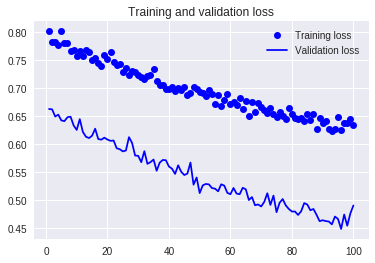

In [50]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
save_path = 'weatherPred_GRU_49.h5'
model.save(os.path.join(models_path, save_path))

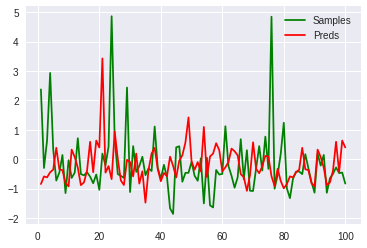

In [76]:
# Plot predictions

preds = model.predict_generator(test_gen,steps = 10)
epochs = range(1, len(f_data[:100]) + 1)
plt.figure()
plt.plot(epochs, f_data[:100], 'g', label='Samples')
plt.plot(epochs, preds,'r', label='Preds')
plt.plot()

plt.legend()